In [1]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import SVD, SVDpp
import matplotlib.pyplot as plt

In [2]:
# Визначення reader для бібліотеки Surprise
reader = Reader(line_format='user item rating timestamp', sep='\t', rating_scale=(1, 5))

In [3]:
# Завантаження датасету за допомогою reader
data = Dataset.load_from_file('./ml-100k/u.data', reader=reader)

In [4]:
# Визначення алгоритмів
svd_algorithm = SVD()
svdpp_algorithm = SVDpp()

In [5]:
# Виконання крос-валідації для SVD
svd_cv_results = cross_validate(svd_algorithm, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9279  0.9328  0.9403  0.9363  0.9386  0.9352  0.0044  
Fit time          2.27    1.08    1.09    1.09    1.16    1.34    0.47    
Test time         0.32    0.17    0.11    0.17    0.27    0.21    0.08    


In [6]:
# Виконання крос-валідації для SVDpp
svdpp_cv_results = cross_validate(svdpp_algorithm, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9226  0.9127  0.9131  0.9259  0.9176  0.9184  0.0052  
Fit time          24.50   18.56   18.08   18.50   29.93   21.92   4.66    
Test time         3.53    3.63    3.73    3.54    6.63    4.21    1.21    


In [7]:
# Обчислення середнього RMSE для кожного алгоритму
avg_rmse_svd = svd_cv_results['test_rmse'].mean()
avg_rmse_svdpp = svdpp_cv_results['test_rmse'].mean()

In [8]:
# Виведення середнього RMSE
print(f'Average RMSE for SVD: {avg_rmse_svd}')
print(f'Average RMSE for SVDpp: {avg_rmse_svdpp}')

Average RMSE for SVD: 0.9351734317442769
Average RMSE for SVDpp: 0.9183817921157112


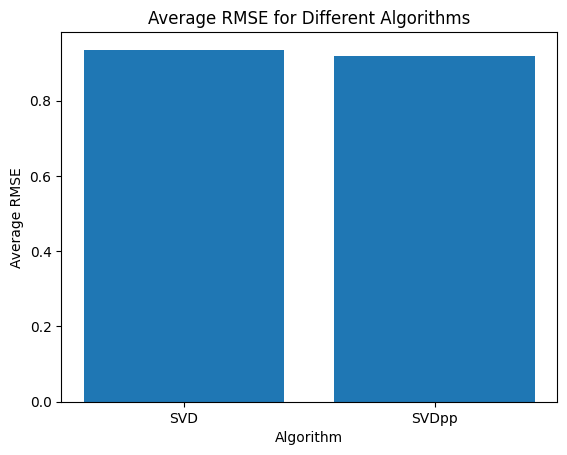

SVDpp is the optimal algorithm.


In [9]:
# Візуалізація результатів
plt.bar(['SVD', 'SVDpp'], [avg_rmse_svd, avg_rmse_svdpp])
plt.title('Average RMSE for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Average RMSE')
plt.show()

if avg_rmse_svd < avg_rmse_svdpp:
    print('SVD is the optimal algorithm.')
else:
    print('SVDpp is the optimal algorithm.')

Висновок - для даного датасету алгоритм SVDpp виявився більш оптимальним (з невеликою різницею)